# Download previews

In [1]:
import pandas
import os

DATA_PATH = 'DATA'

In [2]:
df = pandas.read_csv('data_100v_100c.csv')

try:
    df['timestamp_str'] = df['timestamp']
    df.timestamp = pandas.to_datetime(df.timestamp)
    df = df.set_index('timestamp')
except:
    pass

The json files come with a "path" key, and it seems to work nicely with the way I saved the data:

In [3]:
os.path.exists(os.path.join(DATA_PATH, df.path[0]))

True

In [4]:
df.path[0]

'tiles/29/S/NB/2015/7/25/1'

In [ ]:
import importlib
import aux
importlib.reload(aux)

<module 'aux' from '/Users/manuellevi/PycharmProjects/eai_fire_challenge/aux.py'>

In [ ]:
import importlib
import aux
importlib.reload(aux)
problematic_paths = []
for path in df.path:
    aux.download_file(os.path.join(path,'preview.jpg'))

In [ ]:
len(problematic_paths)

Would be nice to plot them in chronological order.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline 

In [ ]:
img = mpimg.imread(os.path.join(aux.DATA_FOLDER, df.path[0],'preview.jpg'))
imgplot = plt.imshow(img)
plt.title(df.path[0])


We have 28 images. So let's do a 4 by 7 array of plots

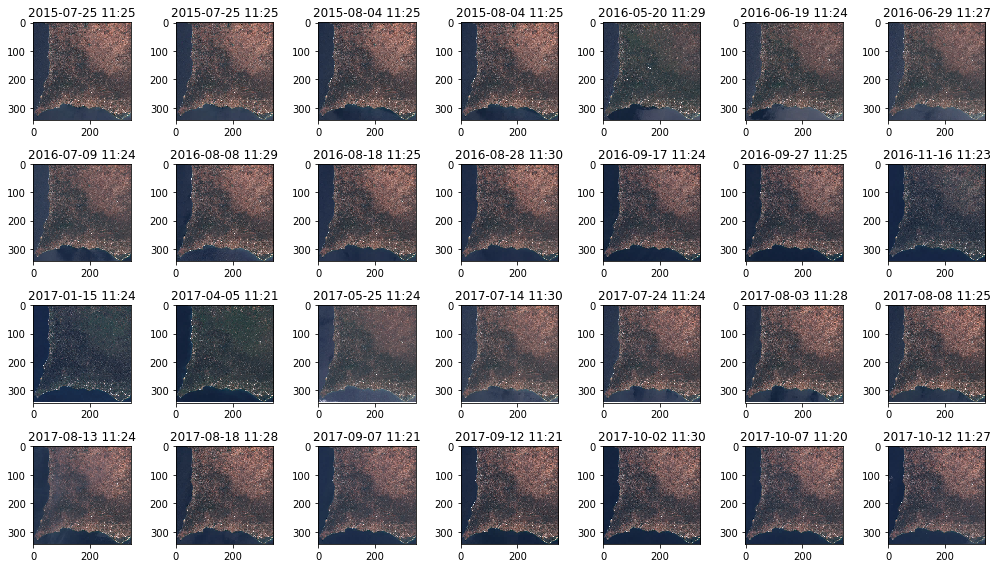

In [288]:
rows = 4
cols = 7
f, axarr = plt.subplots(rows, cols, figsize=(14,8))

img = [mpimg.imread(os.path.join(aux.DATA_FOLDER, path,'preview.jpg')) for path in df.path]

times = df.timestamp_str.str[0:16]

c=0
for i in range(rows):
    for w in range(cols):
        axarr[i, w].imshow(img[c])
        axarr[i, w].set_title(times[c])
        c+=1
plt.tight_layout()

### They seem to change quite a bit, especially the vegetation.

In [289]:
import numpy
arr.shape

(343, 343, 3)

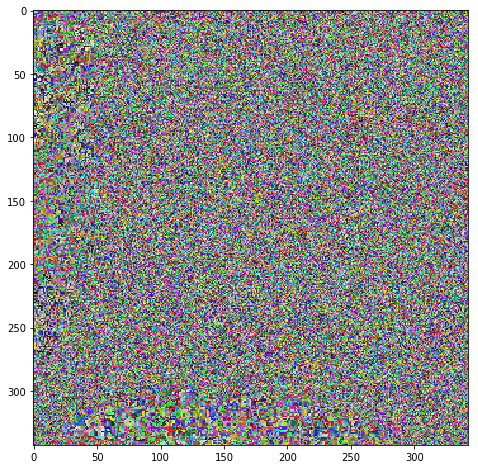

In [290]:
arr = numpy.array(img)
plt.close()
plt.figure(figsize=(16,8))
plt.imshow(arr.mean(axis=(0)))

# uh?!

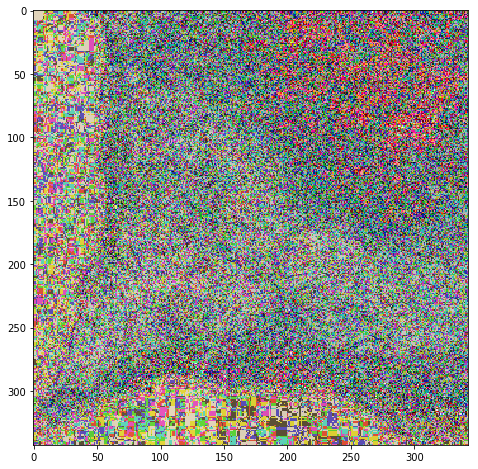

In [291]:
arr = numpy.array(img)
plt.close()
plt.figure(figsize=(16,8))
plt.imshow(numpy.median(arr,axis=(0)))

## Still looks wrong. Water should be blue at least.

I wonder if the color depth for the image is the same!

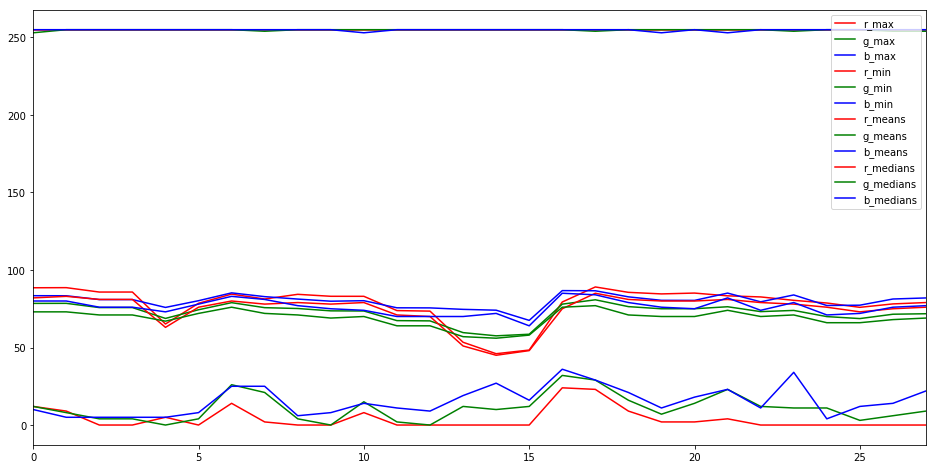

In [299]:
maxs = numpy.max(arr,axis=(1,2))
mins = numpy.min(arr,axis=(1,2))
means = numpy.mean(arr,axis=(1,2))
medians = numpy.median(arr,axis=(1,2))

columns = [c+w for w in ('_max','_min','_means','_medians') for c in 'rgb' ]

a = pandas.DataFrame(numpy.concatenate((maxs,mins,means,medians),axis=1),columns = columns)
a.plot(color = ['r','g','b'],figsize=(16,8))


#pandas.concat((df, a),axis=1)
if 'r_means' not in df.columns:
    a = a.set_index(df.index)
    df = pandas.merge(df,a,left_index=True,right_index=True)

They seem to be in the same range. Mean and median are just not a good way to do this.
Why? Because of RGB color space probably. The "color" changes with the ratios between RGB, not the values themselves, perhaps HSL or HSV would be a better color space.
Maybe I'll check later.

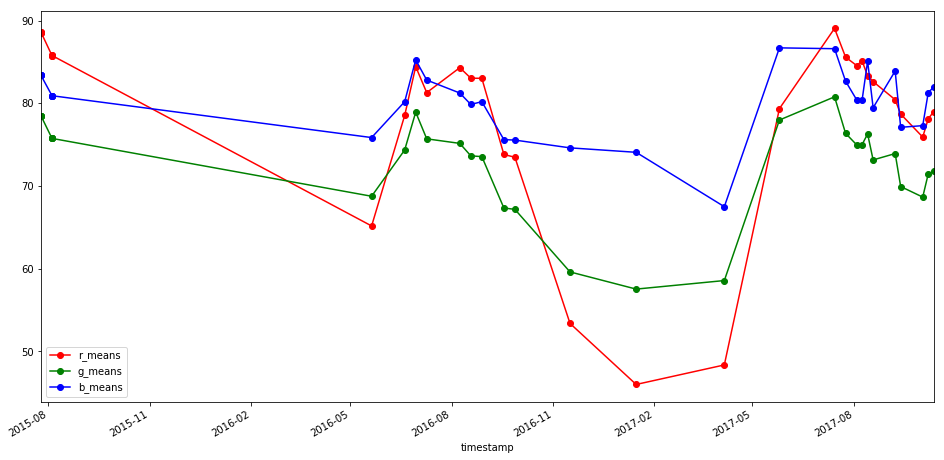

In [301]:
df.loc[:,['r_means','g_means','b_means']].plot(figsize=(16,8),marker='o')

## I wonder if this is correlated with how cloudy were the days before the picture. But I'll leave that for another time